# About Dataset

#### Dataset : Lung Cancer Prediction

#### Source  : Kaggle
#### Aim: 
The aim of lung cancer prediction using machine learning is to develop a model that can accurately classify individuals as having lung cancer or not based on a set of input features.

#### Methodology:
Data Preprocessing: The dataset is preprocessed to handle missing values, outliers, and any inconsistencies in the data.

Feature Selection: Relevant features that have a significant impact on lung cancer prediction are selected.

Model Selection: A suitable machine learning model is selected based on the problem requirements and the characteristics of the dataset.

Model Training: The selected model is trained using the preprocessed dataset.

Model Tuning and Validation: The model's hyperparameters may be fine-tuned to optimize its performance.

Model Evaluation: The trained model is evaluated using evaluation metrics such as accuracy, precision, recall, and F1-score. 

In [1]:
#importing necessariy libraries
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#best hyperparameter
from keras_tuner import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#train test split
from sklearn.model_selection import train_test_split

#for evaluation of accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#lets read the dataset
data = pd.read_csv("cancer patient data sets.csv") 

In [3]:
#lets check first 5 rows of data
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
#lets check last five rows of data
data.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [6]:
#lets check the shape of the data
print("Shape of the Dataset ",data.shape)

Shape of the Dataset  (1000, 26)


In [7]:
data.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [9]:
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [10]:
#lets check NAN value in the data

data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [14]:
data.value_counts('Level')

Level
High      365
Medium    332
Low       303
dtype: int64

In [15]:
#lets check duplicate values 
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [16]:
# Assuming 'df' is your DataFrame
for col in data.columns:
    print(f"Unique values in column '{col}': {data[col].unique()}")


Unique values in column 'index': [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

In [17]:
#Lets sort the values

data_sorted = data.sort_values(by=['Patient Id','Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy','OccuPational Hazards','Genetic Risk',
                                  'chronic Lung Disease','Fatigue','Weight Loss','Shortness of Breath','Wheezing',
                                  'Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough',
                                  'Snoring','Level'], ascending=True)

# print the sorted dataframe
print(data_sorted)


     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

In [18]:
data.corr()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
index,1.000000,0.002674,-0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,0.030743,...,0.049401,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957
Age,0.002674,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.025739,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.053307,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.041374,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.037960,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.032355,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.030725,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.025177,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.030743,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677


## Data Visualization

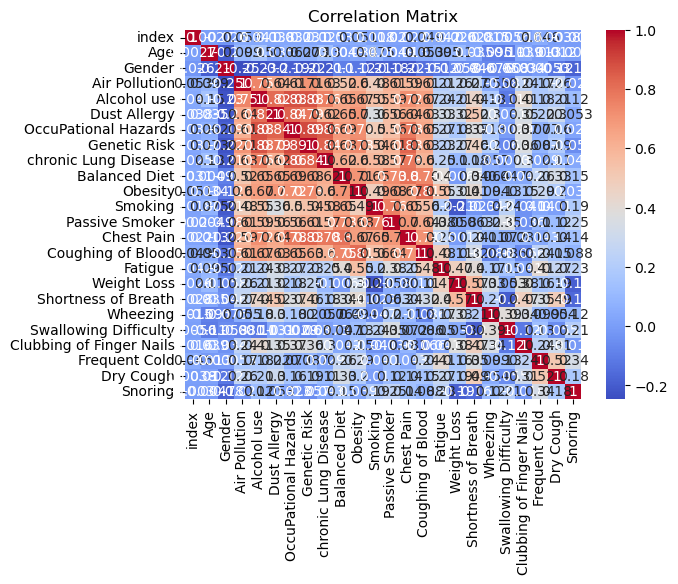

In [19]:
corr_matrix = data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

<AxesSubplot:>

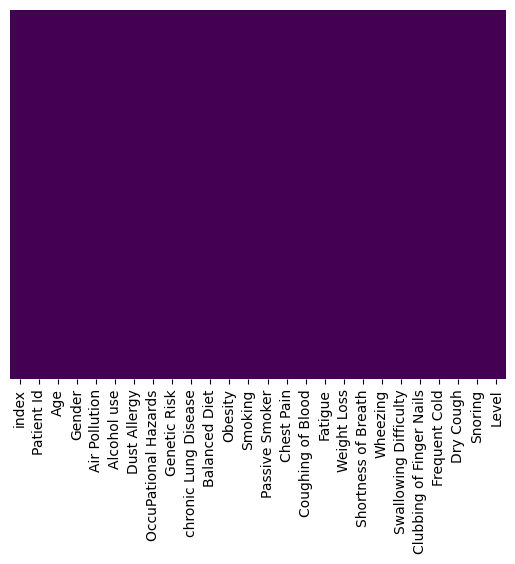

In [20]:
#lets check null values using heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

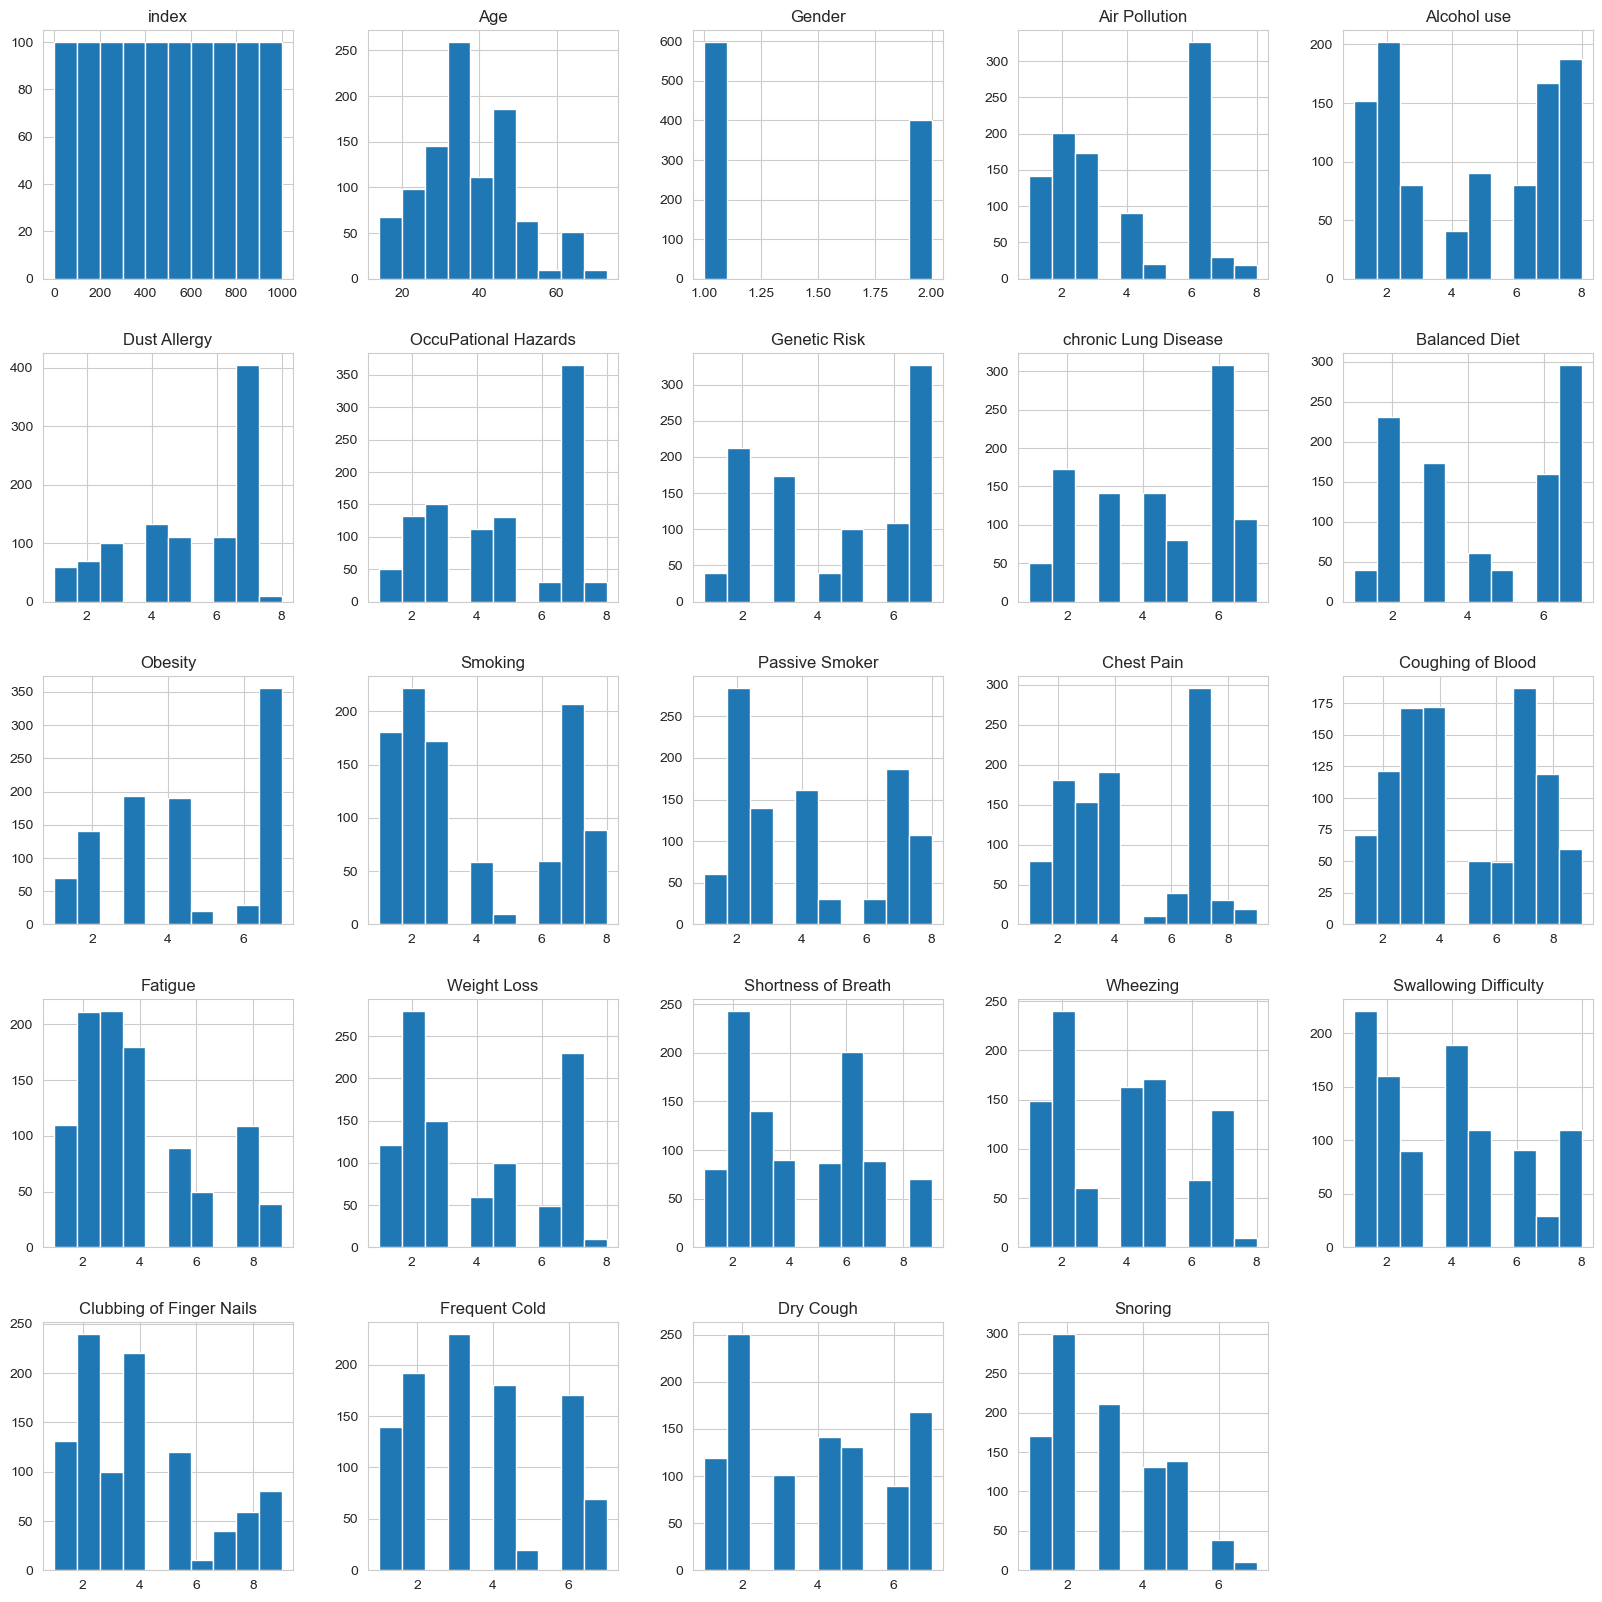

In [160]:
# Plot histograms for all columns
data.hist(figsize=(20,20))
plt.show()

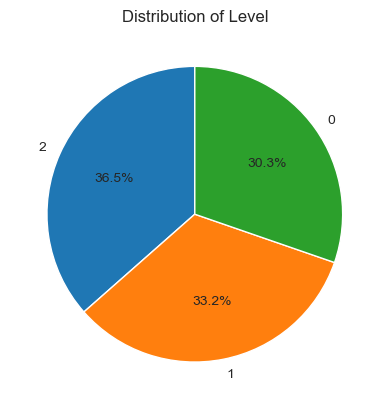

In [138]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'Level' column
level_counts = data['Level'].value_counts()

# Create a pie chart
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Distribution of Level')

# Show the chart
plt.show()


<AxesSubplot:xlabel='Gender', ylabel='count'>

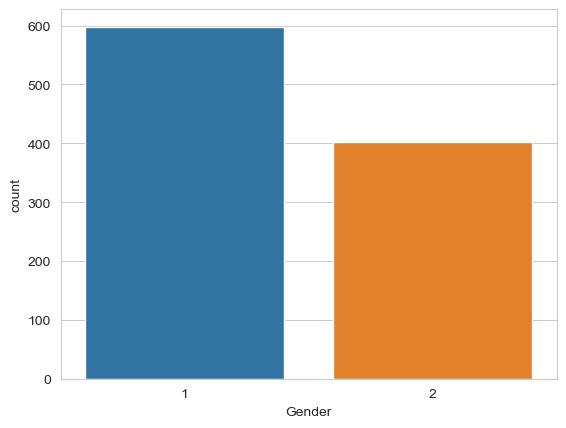

In [116]:
sns.set_style(style='whitegrid')
sns.countplot(x='Gender',data=data)

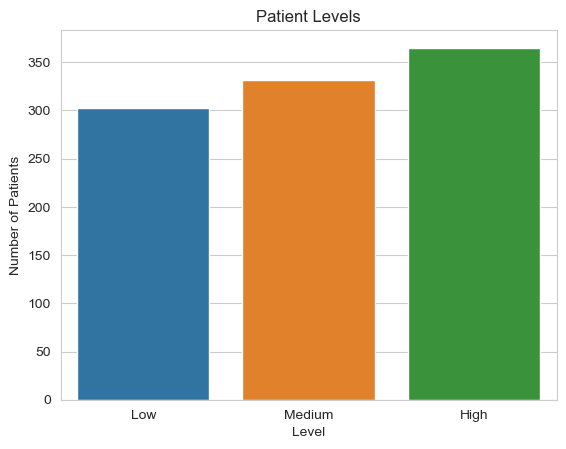

In [117]:
# Create a countplot of the target variable
sns.countplot(x='Level', data=data)
plt.title('Patient Levels')
plt.xlabel('Level')
plt.ylabel('Number of Patients')
plt.show()

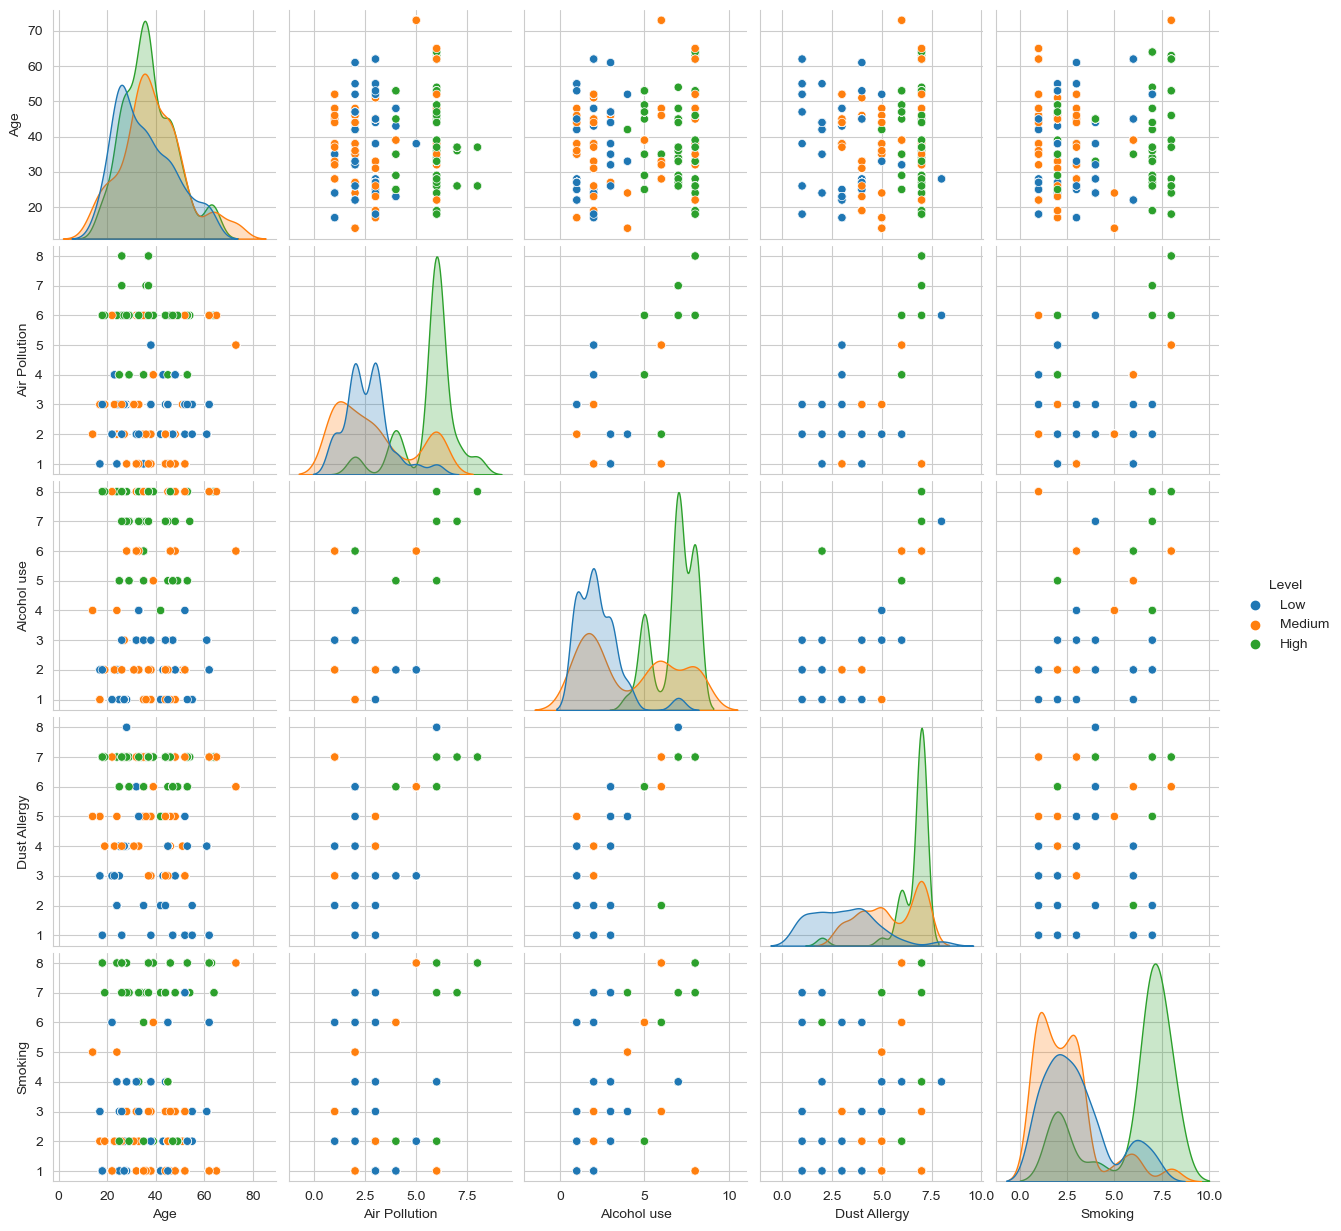

In [119]:
vars_to_plot = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'Smoking', 'Level']
sns.pairplot(data=data[vars_to_plot], hue='Level', diag_kind='kde')


<AxesSubplot:xlabel='Level', ylabel='chronic Lung Disease'>

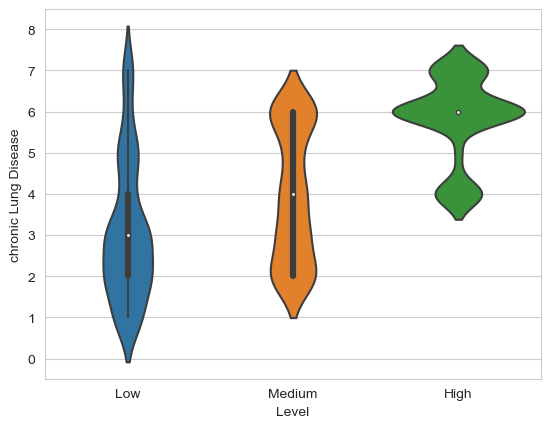

In [120]:
sns.violinplot(data=data, x='Level', y='chronic Lung Disease')


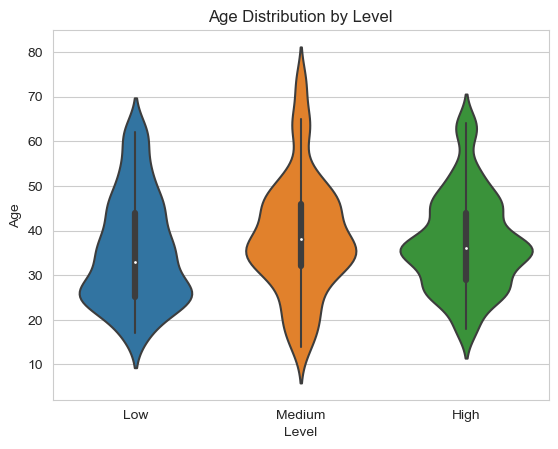

In [121]:
sns.violinplot(data=data, x='Level', y='Age')
plt.title('Age Distribution by Level')
plt.show()


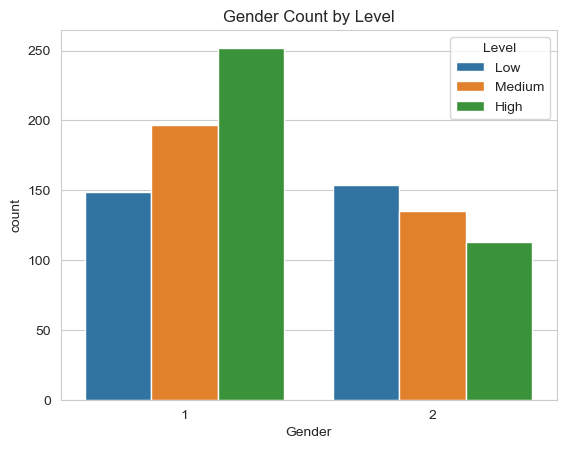

In [122]:
sns.countplot(data=data, x='Gender', hue='Level')
plt.title('Gender Count by Level')
plt.show()


C:\Users\91808\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91808\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91808\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Level', ylabel='Age'>

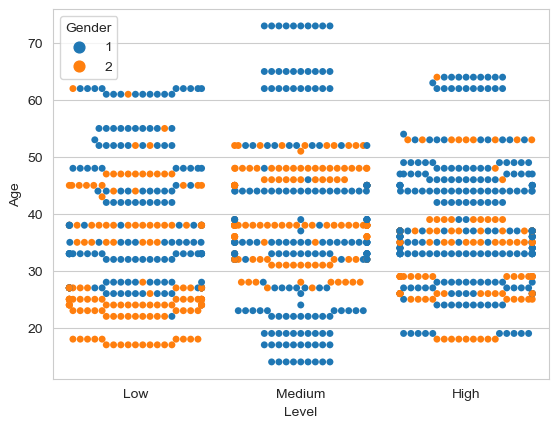

In [161]:

sns.set_style('whitegrid')
sns.swarmplot(x='Level', y='Age', hue='Gender', data=data)


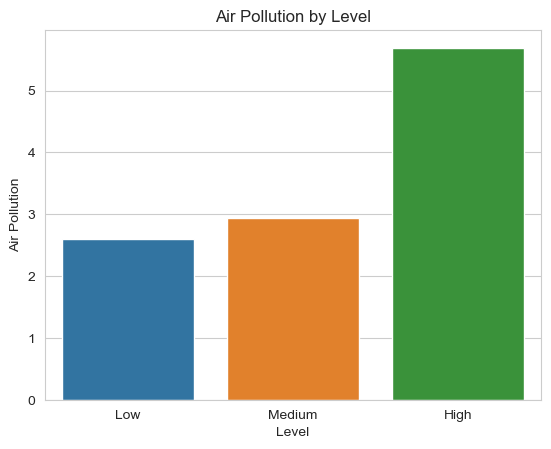

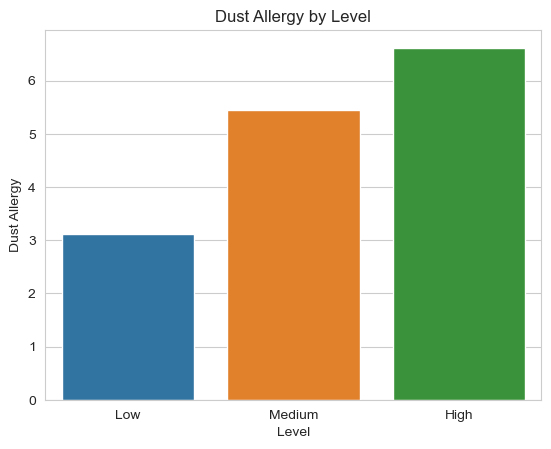

In [123]:
sns.barplot(data=data, x='Level', y='Air Pollution', ci=None)
plt.title('Air Pollution by Level')
plt.show()

sns.barplot(data=data, x='Level', y='Dust Allergy', ci=None)
plt.title('Dust Allergy by Level')
plt.show()


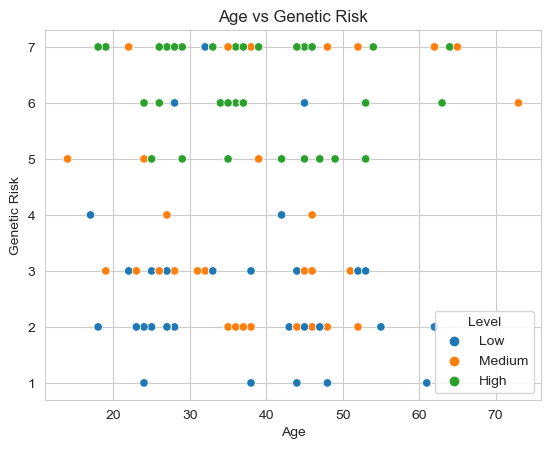

In [124]:
sns.scatterplot(data=data, x='Age', y='Genetic Risk', hue='Level')
plt.title('Age vs Genetic Risk')
plt.xlabel('Age')
plt.ylabel('Genetic Risk')
plt.show()


In [21]:
# Drop 'Patient Id' column
data = data.drop(['Patient Id','index'], axis=1)

# Map categorical values in 'Level' column to numerical values
level_map = {'Low': 0, 'Medium': 1, 'High': 2}
data['Level'] = data['Level'].map(level_map)



In [22]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [23]:
X = data.iloc[:, 0:23]   #input features (X)
y = data.iloc[:, 23]     #target variable(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 23)
Shape of y: (1000,)


In [24]:
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [25]:
y

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

## Training and Testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The Shape of X train:", X_train.shape)
print("The Shape of X test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)

The Shape of X train: (800, 23)
The Shape of X test: (200, 23)
The Shape of y_train: (800,)
The Shape of y_test: (200,)


## We are using Keras Tunner for the best set of hyperparameters

In [27]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

In [179]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='output',
    project_name='lung_cancer_prediction')

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)


Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.3149999976158142

Best val_accuracy So Far: 0.3149999976158142
Total elapsed time: 00h 01m 59s
INFO:tensorflow:Oracle triggered exit


## Logistics Regression

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# define the perform function
def perform(y_pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the logistic regression model is: {accuracy}')
      

# create the Logistic Regression model
logreg = LogisticRegression()

# fit the model on training data
logreg.fit(X_train, y_train)

# predict on test data
y_pred = logreg.predict(X_test)

# evaluate the model
perform(y_pred)

The accuracy of the logistic regression model is: 0.995
Confusion Matrix:
[[54  1  0]
 [ 0 63  0]
 [ 0  0 82]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        63
           2       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



C:\Users\91808\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


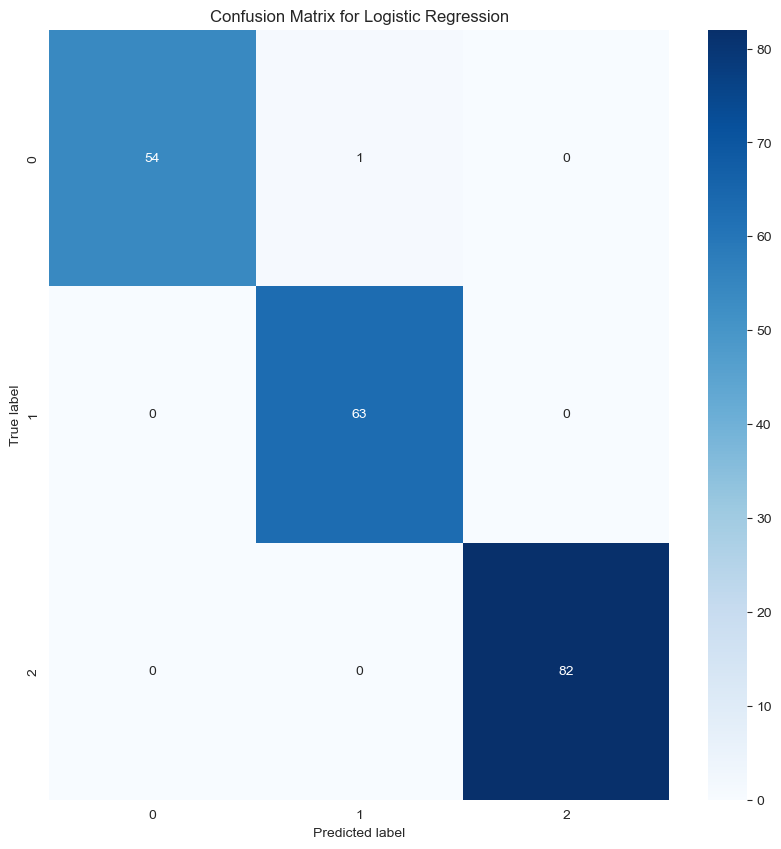

In [247]:
#lets print the confusion matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [249]:
#lets check our model is correctly predicted or not

y_pred = logreg.predict(X_test)
y_test = y_test.reset_index(drop=True)
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print("Incorrect prediction: Actual value:", y_test[i], " Predicted value:", y_pred[i])
    else:
        print("Correct prediction: Value:", y_pred[i])


Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 2
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 0
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 1
Correct prediction: Value: 0
Correct prediction: Value: 2
Correct prediction: Value: 0
Correct prediction: Value: 2
Correct prediction: Value: 2
Correct prediction: Value: 2
Correct prediction: Value: 2
Correct prediction: Value: 1
Correct prediction: Value: 0
Correct prediction: Value: 1
Correct prediction: Value: 2
Correct prediction: Value: 0
Correct prediction: Value: 1
Correct prediction: Value: 2
Correct prediction: Value: 0
Correct prediction: Value: 0
Correct prediction: Value: 0
Correct prediction: Value: 2
Correct prediction: Value: 1
Correct prediction: Value: 0
Correct predic

## Random Forest Classifier

In [251]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 1.0
[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


In [210]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Decision Tree Classifier

In [213]:
# Initialize and train decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 1.0
[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


In [214]:
# Get the classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Support Vector Machine

In [237]:
from sklearn import svm

# Initialize the SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy:  1.0
Confusion Matrix:
[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


In [238]:

# Compute the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



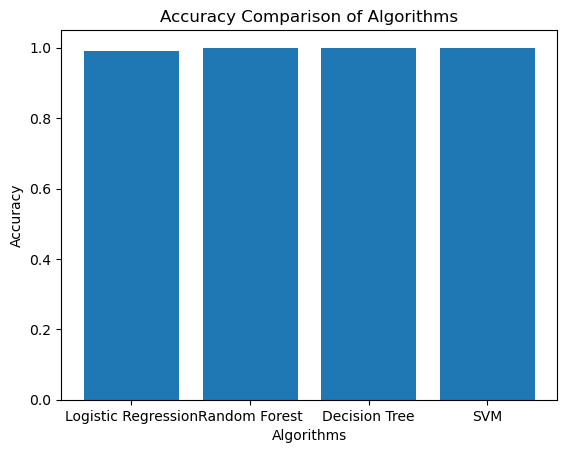

In [30]:
# Create a figure and axes
fig, ax = plt.subplots()

# Define the labels for the x-axis (Algorithms)
langs = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']

# Define the values for the y-axis (Accuracy)
students = [0.99, 1.0, 1.0, 1.0]

# Create a bar plot
ax.bar(langs, students)

# Set the x-axis label
plt.xlabel('Algorithms')

# Set the y-axis label
plt.ylabel('Accuracy')

# Set the title of the plot
plt.title('Accuracy Comparison of Algorithms')

# Display the plot
plt.show()


## Thank You